# Perform Decision Tree Classification on the Give dataset(data.csv) below.

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [17]:
df1 = pd.read_csv('data.csv')
df1.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062               4    0.286   
1    0.1370   -10.401     1       0.0794  160.083               4    0.588   
2    0.1590    -7.148     1       0.2890   75.044               4    0.173   
3    0.0922   -15.236     1       0.0261   86.468               4    0.230   
4    0.4390   -11.648     0       0.0694  174.004               4    0.904   

       song_title            artist  target  
0        Mask Off            Future       1  
1         Redbone  Childish Gambino       1  
2    Xanny Family            Future       1  
3  Master Of None       Beach House       1  
4  Parallel Lines       Junior Boys       1

In [37]:
#15 Points for Data Preprocessing

In [18]:
df1.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_title          0
artist              0
target              0
dtype: int64

In [19]:
#split dataset in features and target variable

#removed artist and song_title because all values are unique, 
#cannot use it to create decision tree
feature_cols = ['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']
X = df1[feature_cols]
y = df1.target

([<matplotlib.axis.XTick at 0x119e2f198>,
 <a list of 16 Text xticklabel objects>)

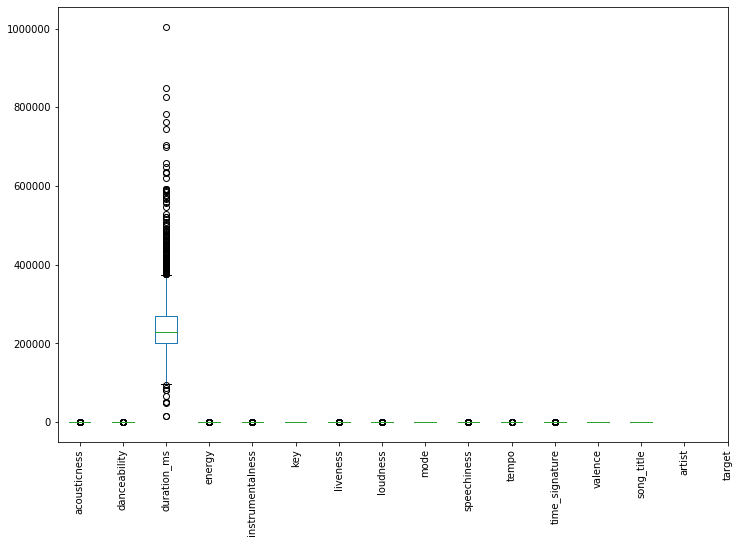

In [20]:
import matplotlib.pyplot as plt
df1.plot.box(figsize=(12,8))
plt.xticks(
    list(range(1, len(df1.columns)+1)), 
    df1.columns,
    rotation='vertical')

In [21]:
df1.corr()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.179894     0.071536 -0.646319   
danceability         -0.179894      1.000000     0.004695  0.038557   
duration_ms           0.071536      0.004695     1.000000 -0.144473   
energy               -0.646319      0.038557    -0.144473  1.000000   
instrumentalness      0.144397     -0.130561     0.305403 -0.122890   
key                  -0.081037      0.022325     0.023570  0.072886   
liveness             -0.117126     -0.132044     0.023203  0.217435   
loudness             -0.562021      0.104362    -0.273798  0.762177   
mode                  0.068028     -0.047867    -0.074806 -0.070263   
speechiness          -0.099893      0.142661    -0.079562  0.093102   
tempo                -0.127596     -0.143538    -0.076469  0.165721   
time_signature       -0.190353      0.128909    -0.040157  0.182895   
valence              -0.152227      0.442061    -0.120030  0.278383   
target               -0.129627      0.176706     0.146749  0.039688   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.144397 -0.081037 -0.117126 -0.562021  0.068028   
danceability             -0.130561  0.022325 -0.132044  0.104362 -0.047867   
duration_ms               0.305403  0.023570  0.023203 -0.273798 -0.074806   
energy                   -0.122890  0.072886  0.217435  0.762177 -0.070263   
instrumentalness          1.000000 -0.009640  0.001063 -0.354625 -0.030099   
key                      -0.009640  1.000000  0.049739  0.050929 -0.195040   
liveness                  0.001063  0.049739  1.000000  0.156648 -0.018587   
loudness                 -0.354625  0.050929  0.156648  1.000000 -0.044015   
mode                     -0.030099 -0.195040 -0.018587 -0.044015  1.000000   
speechiness              -0.155349  0.019116  0.092403  0.088844 -0.049398   
tempo                     0.000347  0.040301  0.010558  0.156418 -0.059995   
time_signature           -0.070721  0.024937  0.018199  0.143011 -0.039038   
valence                  -0.194630  0.032485 -0.053011  0.204968 -0.032879   
target                    0.152594  0.033594  0.026364 -0.072000 -0.072336   

                  speechiness     tempo  time_signature   valence    target  
acousticness        -0.099893 -0.127596       -0.190353 -0.152227 -0.129627  
danceability         0.142661 -0.143538        0.128909  0.442061  0.176706  
duration_ms         -0.079562 -0.076469       -0.040157 -0.120030  0.146749  
energy               0.093102  0.165721        0.182895  0.278383  0.039688  
instrumentalness    -0.155349  0.000347       -0.070721 -0.194630  0.152594  
key                  0.019116  0.040301        0.024937  0.032485  0.033594  
liveness             0.092403  0.010558        0.018199 -0.053011  0.026364  
loudness             0.088844  0.156418        0.143011  0.204968 -0.072000  
mode                -0.049398 -0.059995       -0.039038 -0.032879 -0.072336  
speechiness          1.000000  0.111359        0.113529  0.054419  0.154006  
tempo                0.111359  1.000000       -0.055918 -0.014965  0.034732  
time_signature       0.113529 -0.055918        1.000000  0.134722  0.040182  
valence              0.054419 -0.014965        0.134722  1.000000  0.107930  
target               0.154006  0.034732        0.040182  0.107930  1.000000

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt


# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [41]:
# plot Decision tree
tree.plot_tree(clf,filled=True)
plt.rcParams["figure.figsize"] = (500,100)
plt.savefig('tree.pdf')

plt.show()

# I will upload the pdf for the tree

In [31]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7013201320132013


# Decision Tree w/ cross validation

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from pprint import pprint
scalar = StandardScaler()

In [34]:
c = DecisionTreeClassifier(min_samples_split = 100)
# The minimum value to split value to split the samples is used as 100, based on the data size. 
# If the minimum split value is a less value the dense decision tree will be generated.

X = df1[feature_cols]
y = df1.target

In [36]:
depth = []
d_scores = []
for i in range(3,30):
    c = DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation
    pipeline = Pipeline([('transformer', scalar), ('estimator', c)])
    scores = cross_val_score(pipeline, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
    d_scores.append((i,scores))
pprint(depth)

[(3, 0.6842455358518347),
 (4, 0.6975800363186881),
 (5, 0.6995435309465728),
 (6, 0.6807423830364284),
 (7, 0.6896451610295004),
 (8, 0.6653635868503308),
 (9, 0.6702877767558482),
 (10, 0.6643215810953745),
 (11, 0.6668050888456769),
 (12, 0.6623443076417558),
 (13, 0.6673407167745147),
 (14, 0.654419682746365),
 (15, 0.6623545341139804),
 (16, 0.6608526600501511),
 (17, 0.652432194781308),
 (18, 0.6658199147664805),
 (19, 0.6623597071540238),
 (20, 0.6568843701995384),
 (21, 0.6573769811607092),
 (22, 0.6563934875719777),
 (23, 0.6707716862450385),
 (24, 0.6588530139458939),
 (25, 0.6469860840079695),
 (26, 0.6553928063334372),
 (27, 0.6643679710047578),
 (28, 0.655404940551065),
 (29, 0.6618568099166974)]


In [37]:
for ea in d_scores:
    print("height = ", ea[0]," -> \n", ea[1], '\n')

height =  3  -> 
 [0.70934256 0.76470588 0.52249135 0.6875     0.67013889 0.73867596
 0.69686411] 

height =  4  -> 
 [0.73356401 0.74740484 0.63321799 0.67361111 0.65972222 0.728223
 0.70731707] 

height =  5  -> 
 [0.77508651 0.73010381 0.64013841 0.68055556 0.64583333 0.73170732
 0.69337979] 

height =  6  -> 
 [0.74740484 0.7266436  0.57439446 0.63194444 0.65972222 0.728223
 0.69686411] 

height =  7  -> 
 [0.73356401 0.69896194 0.65397924 0.70833333 0.62152778 0.72473868
 0.68641115] 

height =  8  -> 
 [0.70588235 0.69550173 0.62283737 0.625      0.61111111 0.73519164
 0.66202091] 

height =  9  -> 
 [0.71280277 0.73702422 0.62283737 0.61111111 0.63541667 0.70383275
 0.66898955] 

height =  10  -> 
 [0.71626298 0.71626298 0.64359862 0.59027778 0.63541667 0.68989547
 0.65853659] 

height =  11  -> 
 [0.70588235 0.70242215 0.6366782  0.63888889 0.65972222 0.67944251
 0.6445993 ] 

height =  12  -> 
 [0.72318339 0.71626298 0.61937716 0.58680556 0.64583333 0.68989547
 0.65505226] 

h

In [38]:
# Height 5

k_fold_summary = []
for i in range(3,15):
    c = DecisionTreeClassifier(max_depth=5)
    # Perform 7-fold cross validation 
    pipeline = Pipeline([('transformer', scalar), ('estimator', c)])
    scores = cross_val_score(pipeline, X=X, y=y, cv=i, n_jobs=4)
    k_fold_summary.append((i,scores.mean()))
#     d_scores.append((i,scores))
pprint(k_fold_summary)

[(3, 0.6752355598009387),
 (4, 0.6940869086908691),
 (5, 0.6856447927671179),
 (6, 0.6831490509161132),
 (7, 0.6916070230100649),
 (8, 0.708935721759427),
 (9, 0.6940846719023103),
 (10, 0.6742820550711787),
 (11, 0.7015572927903648),
 (12, 0.6652812998966845),
 (13, 0.7020509680559309),
 (14, 0.705968696054903)]


In [ ]:
k = 4, results in high accuracy which is very close k = 7, 
however due to the larger computation requirement, k= 4 will be preffered